In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
colors = ["Gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
# city_data
ride_data = pd.read_csv("data/ride_data.csv")
#ride_data
#unemployed_data_one = pd.read_csv("../Resources/unemployment_2010-2011.csv")
#unemployed_data_two = pd.read_csv("../Resources/unemployment_2012-2014.csv")

# Combine the data into a single dataset
#combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
#combined_unemployed_data.head()
combined_city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
combined_city_ride_data.head()
#combined_city_ride_data.count()
# combined_city_ride_data.dtypes
# source_cols = combined_city_ride_data.columns
# print(source_cols)

#combined_city_ride_data.apply(pd.Series.value_counts) #error on type


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

## Bubble Plot of Ride Sharing Data

In [25]:
#combined_city_ride_data.head()
# Create a group based on the values in the 'type' column
# scatter_group = combined_city_ride_data.groupby('type')
# scatter_group.head()
#Split dataframes by type
x_limit = 45
urban_type = combined_city_ride_data.loc[combined_city_ride_data["type"] == "Urban", :]
suburban_type = combined_city_ride_data.loc[combined_city_ride_data["type"] == "Suburban", :]
rural_type = combined_city_ride_data.loc[combined_city_ride_data["type"] == "Rural", :]
#print(rural_type)

#Calcualte by type average fare and total rides
urban_type_city_tot = urban_type.groupby("city").count()['ride_id']
# urban_type_tot = urban_type_city.count()['ride_id']
urban_type_avg = urban_type.groupby("city").mean()['fare']
urban_type_drive = urban_type.groupby("city").mean()['driver_count']

suburban_type_city_tot = suburban_type.groupby("city").count()['ride_id']
# suburban_type_tot = suburban_type.groupby("city").count()['ride_id']
suburban_type_avg = suburban_type.groupby("city").mean()['fare']
suburban_type_drive = suburban_type.groupby("city").mean()['driver_count']


rural_type_city_tot = rural_type.groupby("city").count()['ride_id']
# rural_type_tot = rural_type['ride_id'].count()
rural_type_avg = rural_type.groupby("city").mean()['fare']
rural_type_drive = rural_type.groupby("city").mean()['driver_count']
#print(rural_type_tot)






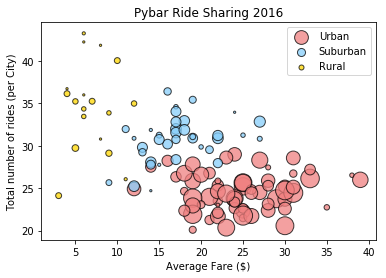

In [37]:
urban_line = plt.scatter(urban_type_city_tot, urban_type_avg, marker="o", facecolors="lightcoral", edgecolors="black", 
            s=5*urban_type_drive,
            alpha=0.75, label="Urban")
suburban_line = plt.scatter(suburban_type_city_tot, suburban_type_avg, marker="o", facecolors="lightskyblue", edgecolors="black", 
            s=5*suburban_type_drive, alpha=0.75, label="Suburban")
rural_line = plt.scatter(rural_type_city_tot, rural_type_avg, marker="o", facecolors="Gold", edgecolors="black", 
                            s=5*rural_type_drive, alpha=0.75, label="Rural")
plt.title("Pybar Ride Sharing 2016")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total number of rides (per City)")
plt.legend(handles=[urban_line,suburban_line, rural_line], loc="best") #,suburban_line, rural_line
plt.show()

In [38]:
# Show plot
plt.show()

## Total Fares by City Type

In [39]:
# Calculate Type Percents
#combined_city_ride_data.head()
 
# Count how many fares by type
# total_fares = combined_city_ride_data["fare"].sum()
# print(total_fares)
uniq_types = combined_city_ride_data["type"].unique()
# print(uniq_types)
# type_counts = combined_city_ride_data["type"].value_counts()
# print(type_counts.head())

type_groups = combined_city_ride_data.groupby('type')
#type_groups.head()
# sum_it_up = type_groups.sum()['fare']
# del sum_it_up['ride_id']
# del sum_it_up['driver_count']
# sum_it_up.head(12)

##############



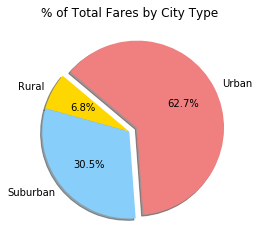

In [40]:
# Show Figure
explode = (0, 0, 0.1)
# # Tell matplotlib to create a pie chart based upon the above date
plt.title('% of Total Fares by City Type')
plt.pie(sum_it_up, explode=explode, labels=labels, colors=colors, 
                       autopct='%1.1f%%', shadow=True, startangle=140)

# # Create axes which are equal so we have a perfect circle
plt.show()#("equal")
#plt.axis("equal")
#plt.show()

## Total Rides by City Type

In [53]:
#combined_city_ride_data.head()

# Count how many fares by type
# uniq_types = combined_city_ride_data["type"].unique()
# print(uniq_types)

type_counts = combined_city_ride_data["type"].value_counts().sort_values(inplace=False)
# print(type_counts.head())

#type_loc = list(type_counts.type)
#print(list(combined_city_ride_data.columns.values))
#print(list(type_counts.head()))

#print(type_loc)
#total_type_count = combined_city_ride_data["type"].count()
# total_type_count.head()
# print(total_type_count)

##############

# explode = (0.1, 0, 0)
# # Tell matplotlib to create a pie chart based upon the above data
# plt.title('% of Total Rides by City Type')
# ride_by = plt.pie(type_counts, explode=explode, labels=labels, colors=colors, 
#         autopct='%1.1f%%', 
#         shadow=True, 
#         startangle=80)#, name='series')#, title=("Percent of total rides by city type"))
# #ride_by.set_ylabel("Trip Duration")
# # Create axes which are equal so we have a perfect circle
# plt.show()#("equal")

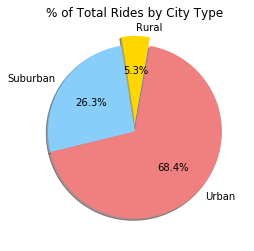

In [54]:
# Show Figure
explode = (0.1, 0, 0)
# Tell matplotlib to create a pie chart based upon the above data
plt.title('% of Total Rides by City Type')
ride_by = plt.pie(type_counts, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=80)#, name='series')#, title=("Percent of total rides by city type"))
#ride_by.set_ylabel("Trip Duration")
# Create axes which are equal so we have a perfect circle
# plt.show()#("equal")

## Total Drivers by City Type

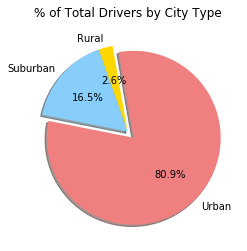

In [43]:
# combined_city_ride_data.head()
# Calculate Driver Percents
# total_drivers = combined_city_ride_data["driver_count"].sum()
# print(total_drivers)
# Create a group based on the values in the 'type' column
driver_group = city_data.groupby('type')

# Count how many times each maker appears in our group
count_makers = driver_group['driver_count'].sum()

# count_makers.head()


# # Build Pie Charts
explode = (0, 0, 0.1)
# Tell matplotlib to create a pie chart based upon the above data
# tot_drivers = 
plt.title('% of Total Drivers by City Type')
plt.pie(count_makers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
#, name='series')#, title=("Percent of total rides by city type"))
#ride_by.set_ylabel("Trip Duration")
# Create axes which are equal so we have a perfect circle
plt.show()#("equal")



In [ ]:
# Show Figure
plt.show()